## Introduction

![](giphy.gif)

## Covid-19 in India Data Visualization

Dataset: The data has been collected from various sources such as Indian Ministry of Health & Family Welfare, covid19india.org and few online articles and resource. This data was summarized and downloaded from Kaggle.

Hypothesis/assumptions: The assumption is that this data is accurate and takes into account the entire population of India and how the Covid-19 outbreak has affected it. The data collected for this project is limited until May 21st or earlier for some of the datasets.

Goals: The goal of this project is to analyze different facts about how this pandemic has affected India:
-	When these cases began
-	Cases in relation to the population
-	Rural population vs urban population
-	Affected Age group
-	Testing in different parts of the country
-	Gender most affected

As cases of Covid-19 continue to rise across the globe, so has data associated with it. This includes information on the number of affected patients, the number of people they are likely to infect, equipment that is available for healthcare workers, as well as the death and recovery rates, among others.

With the rapid spread in the novel corona-virus across countries, we are getting data from various sources and visualizing the data can help explain the developing events in a clear and succinct way for people to interpret data well, tease out patterns, and pick up on trends.

Some key facts to put the Covid-19 situation for India into perspective:
- Implemented a strict 21 day lockdown on March 24th when the total confirmed coronavirus cases in India were around 500. It stands at 265k active cases as of today
- The population of India is 1.35 billion

Reading the Data from Kaggle


In [1]:
pwd

'/Users/syedhussain/Desktop/Project/Datasets/covid19-in-india'

In [2]:
ls

AgeGroupDetails.csv*             Project Analysis.ipynb
Analysis/                        StatewiseTestingDetails.csv*
HospitalBedsIndia.csv*           covid_19_india.csv*
ICMRTestingDetails.csv*          giphy.gif
ICMRTestingLabs.csv*             population_india_census2011.csv*
IndividualDetails.csv*


In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
Age = pd.read_csv("./AgeGroupDetails.csv")

In [9]:
State_cases = pd.read_csv("./covid_19_india.csv")
Beds = pd.read_csv("./HospitalBedsIndia.csv")
Testing_details = pd.read_csv("./ICMRTestingDetails.csv")
Testing_labs = pd.read_csv("./ICMRTestingLabs.csv")
Individual_details = pd.read_csv("./IndividualDetails.csv")
Population_census2011 = pd.read_csv("./population_india_census2011.csv")
State_testing = pd.read_csv("./StatewiseTestingDetails.csv")

# Lets Explore the Dataset Properties and clean them


Exploring Age

In [6]:
Age.describe()

,Sno,TotalCases
count,10.00000,10.000000
mean,5.50000,69.200000
std,3.02765,59.241127
min,1.00000,9.000000
25%,3.25000,23.250000
50%,5.50000,52.500000
75%,7.75000,106.250000
max,10.00000,172.000000


In [210]:
Age.tail()

,Sno,AgeGroup,TotalCases,Percentage
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [7]:
# Replacing Missing values with 0:

Age=Age.replace(to_replace="Missing",value="0")

Age.head(10)

df = pd.DataFrame(Age, index = [0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 80-79,'>=80',0])

df.head(10)

Age.columns





Index(['Sno', 'AgeGroup', 'TotalCases', 'Percentage'], dtype='object')

In [8]:
# Dropping extra columns
Age.drop(['Sno'],axis=1)

,AgeGroup,TotalCases,Percentage
0,0-9,22,3.18%
1,10-19,27,3.90%
2,20-29,172,24.86%
3,30-39,146,21.10%
4,40-49,112,16.18%
5,50-59,77,11.13%
6,60-69,89,12.86%
7,70-79,28,4.05%
8,>=80,10,1.45%
9,0,9,1.30%


 Exploring the State_cases table


In [10]:
State_cases.shape

State_cases.head(100)

State_cases.dtypes

State_cases.tail(10)

State_cases.dtypes

State_cases.describe()



,Sno,Cured,Deaths,Confirmed
count,2168.000000,2166.000000,2166.000000,2168.000000
mean,1084.500000,260.407664,27.811173,866.699723
std,625.992013,798.193671,107.967585,2831.225061
min,1.000000,0.000000,0.000000,0.000000
25%,542.750000,0.000000,0.000000,7.000000
50%,1084.500000,10.000000,1.000000,42.000000
75%,1626.250000,87.750000,8.000000,490.000000
max,2168.000000,10318.000000,1390.000000,39297.000000


In [11]:
## Replacing NaN with so its easier to analyse this data

State_cases['Cured'].fillna(0)

State_cases['Deaths'].fillna(0)

State_cases['Cured'] = State_cases['Cured'].fillna(0)

State_cases['Deaths'] = State_cases['Deaths'].fillna(0)


State_cases.head(100)



,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,3,1/2/20,6:00 PM,Kerala,2,0,0.0,0.0,2
1,32,1/3/20,6:00 PM,Kerala,3,0,0.0,0.0,3
2,530,1/4/20,7:30 PM,Andhra Pradesh,-,-,1.0,0.0,83
3,531,1/4/20,7:30 PM,Andaman and Nicobar Islands,-,-,0.0,0.0,10
4,532,1/4/20,7:30 PM,Assam,-,-,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
95,587,2/4/20,6:00 PM,West Bengal,-,-,6.0,3.0,53
96,1511,2/5/20,5:00 PM,Andaman and Nicobar Islands,-,-,16.0,0.0,33
97,1512,2/5/20,5:00 PM,Andhra Pradesh,-,-,403.0,33.0,1463
98,1513,2/5/20,5:00 PM,Arunachal Pradesh,-,-,1.0,0.0,1


In [292]:
#Dropping columns not needed

State_cases.drop(['Sno'],axis=1)


,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-02-01,6:00 PM,Kerala,2,0.0,0.0,0.0,2
1,2020-03-01,6:00 PM,Kerala,3,0.0,0.0,0.0,3
2,2020-04-01,7:30 PM,Andhra Pradesh,-,NaN,1.0,0.0,83
3,2020-04-01,7:30 PM,Andaman and Nicobar Islands,-,NaN,0.0,0.0,10
4,2020-04-01,7:30 PM,Assam,-,NaN,0.0,0.0,1
...,...,...,...,...,...,...,...,...
2163,2020-03-31,8:30 PM,Telengana,-,NaN,1.0,1.0,79
2164,2020-03-31,8:30 PM,Uttarakhand,-,NaN,2.0,0.0,7
2165,2020-03-31,8:30 PM,Uttar Pradesh,-,NaN,14.0,0.0,101
2166,2020-03-31,8:30 PM,West Bengal,-,NaN,0.0,2.0,26


In [314]:
State_cases.dtypes

## Changing the data type of ConfirmedForeignNational from an Object to Float

State_cases['ConfirmedForeignNational'] = State_cases['ConfirmedForeignNational'].replace('-',np.nan).astype(float)

In [315]:
Confirmed_Foreign_national = State_cases.groupby('State/UnionTerritory')[['ConfirmedForeignNational']].sum()

To_drop = Confirmed_Foreign_national[Confirmed_Foreign_national['ConfirmedForeignNational']== 0].index

## Dropping the Foreign nationals' rows that have a value of 0


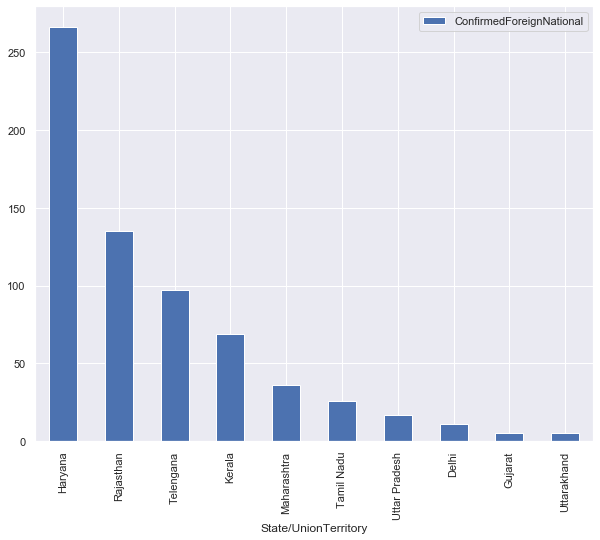

In [316]:
(Confirmed_Foreign_national
     .drop(To_drop)
     .sort_values(by='ConfirmedForeignNational',ascending=False)
     .plot(kind='bar',figsize=(10,8))
);

The above graph shows foreign nationals in the state of Haryana have the highest number of Covid cases compared to foreign nationals in other states. This indicates the Govt could do better at potentially quanrantining people better at the airports in Haryana

In [295]:
#Creating new table from the State_cases table with relevant info and grouping cases by date:

overall_cases=State_cases[['Date','Confirmed','Cured','Deaths']].groupby('Date').sum().reset_index()


In [296]:
## Confirming type of new table created
type(overall_cases)



pandas.core.frame.DataFrame

In [248]:
overall_cases.describe()

overall_cases.head()

,Date,Confirmed,Cured,Deaths
0,2020-01-02,2,0.0,0.0
1,2020-01-03,3,0.0,0.0
2,2020-01-04,1834,144.0,41.0
3,2020-01-05,34972,9065.0,1152.0
4,2020-10-02,3,0.0,0.0


In [246]:
# Changing the Date from an object to a datetime dtype so we can use plots

overall_cases['Date'] = pd.to_datetime(overall_cases['Date'])

overall_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       113 non-null    datetime64[ns]
 1   Confirmed  113 non-null    int64         
 2   Cured      113 non-null    float64       
 3   Deaths     113 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.7 KB


In [297]:
# Checking the data types
overall_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       113 non-null    datetime64[ns]
 1   Confirmed  113 non-null    int64         
 2   Cured      113 non-null    float64       
 3   Deaths     113 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.7 KB


In [42]:
State_cases.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,3,1/2/20,6:00 PM,Kerala,2,0,0.0,0.0,2
1,32,1/3/20,6:00 PM,Kerala,3,0,0.0,0.0,3
2,530,1/4/20,7:30 PM,Andhra Pradesh,-,-,1.0,0.0,83
3,531,1/4/20,7:30 PM,Andaman and Nicobar Islands,-,-,0.0,0.0,10
4,532,1/4/20,7:30 PM,Assam,-,-,0.0,0.0,1


Individual_details

In [20]:
Individual_details.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [21]:
# Replacing the NaN with 0 to easily explore data

Individual_details['age'].fillna(0)

Individual_details['age'] = Individual_details['age'].fillna(0)

Individual_details['gender'].fillna('Unknown')

Individual_details['gender'] = Individual_details['gender'].fillna('Unknown')



In [22]:
Individual_details.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,0,Unknown,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,0,Unknown,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


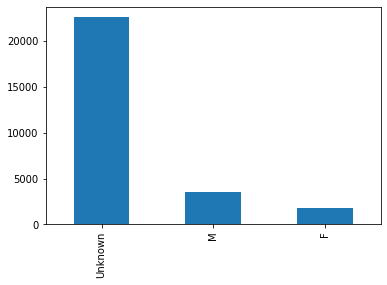

In [23]:
#Exploring the split of cases between genders:

Individual_details.head()


Individual_details['gender'].value_counts().plot(kind='bar');

Removing the rows with gender unknown for the purposes of this presentation and to get a bigger picture comparing
cases in males and females


In [123]:
No_unknown = Individual_details[Individual_details['gender']!= 'Unknown']

In [29]:
Testing_labs.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [226]:
Testing_labs.type.value_counts()

Government Laboratory    182
Private Laboratory        82
Collection Site            3
Name: type, dtype: int64

As shown above, that Government laboratories conduct most of the Covid testing in India. Getting more private labs to help out could assist in increasing the testing capacities


In [346]:
Testing_details.tail()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases
37,38,23/04/20 9:00,541789.0,525667.0,23502.0
38,39,24/04/20 9:00,579957.0,NaN,NaN
39,40,25/04/20 9:00,625309.0,NaN,NaN
40,41,26/04/20 9:00,665819.0,NaN,NaN
41,42,27/04/20 9:00,716733.0,NaN,NaN


In [361]:
Testing_details.TotalIndividualsTested.sum()

4262169.0

The above number shows only 4.2 million tests were conducted until April 27th in India while the US(not the best example either) had done around 8 million tests until around the same date although the US population is only ~25% of India's in number.

The US is also 3 times bigger than India in size allowing for better social distancing, has tested more than double the individuals in India and yet the US has 1.9 million cases so far. This only shows how much worse the Covid cases in India could get in the coming future now that the lockdown restrictions have started to ease in the country.

In [351]:
Individual_details.shape

(27890, 12)

In [167]:
Individual_details.dtypes

id                     int64
government_id         object
diagnosed_date        object
age                   object
gender                object
detected_city         object
detected_district     object
detected_state        object
nationality           object
current_status        object
status_change_date    object
notes                 object
dtype: object

In [32]:
Population_census2011.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [205]:
# Dropping the column Sno since it is an extra index column  
Population_census2011.drop(['Sno'],axis=1, inplace=True)

In [320]:
State_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [323]:
Population_census2011.head()

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [175]:
# Checked if there are any nulls in the State column of all the dataframes since that is the primary key that 
## we joined all the dataframes on to create a Master DataFrame

# Below is an example of the code I ran on all the files to find total nulls:

##State_cases.isnull().sum()

## Lets visualize the data with some charts and graphs

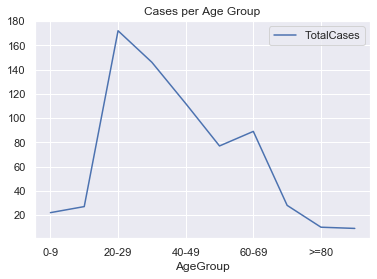

In [304]:
# Total cases per Age Group
Age.set_index('AgeGroup')['TotalCases'].plot(title= 'Cases per Age Group', legend=True );


People in the age group of 20-30 show the highest number of cases in India which is slightly different from the rest of the world.

This above can be corroborated with the below article that appeared in TribuneIndia with below headline

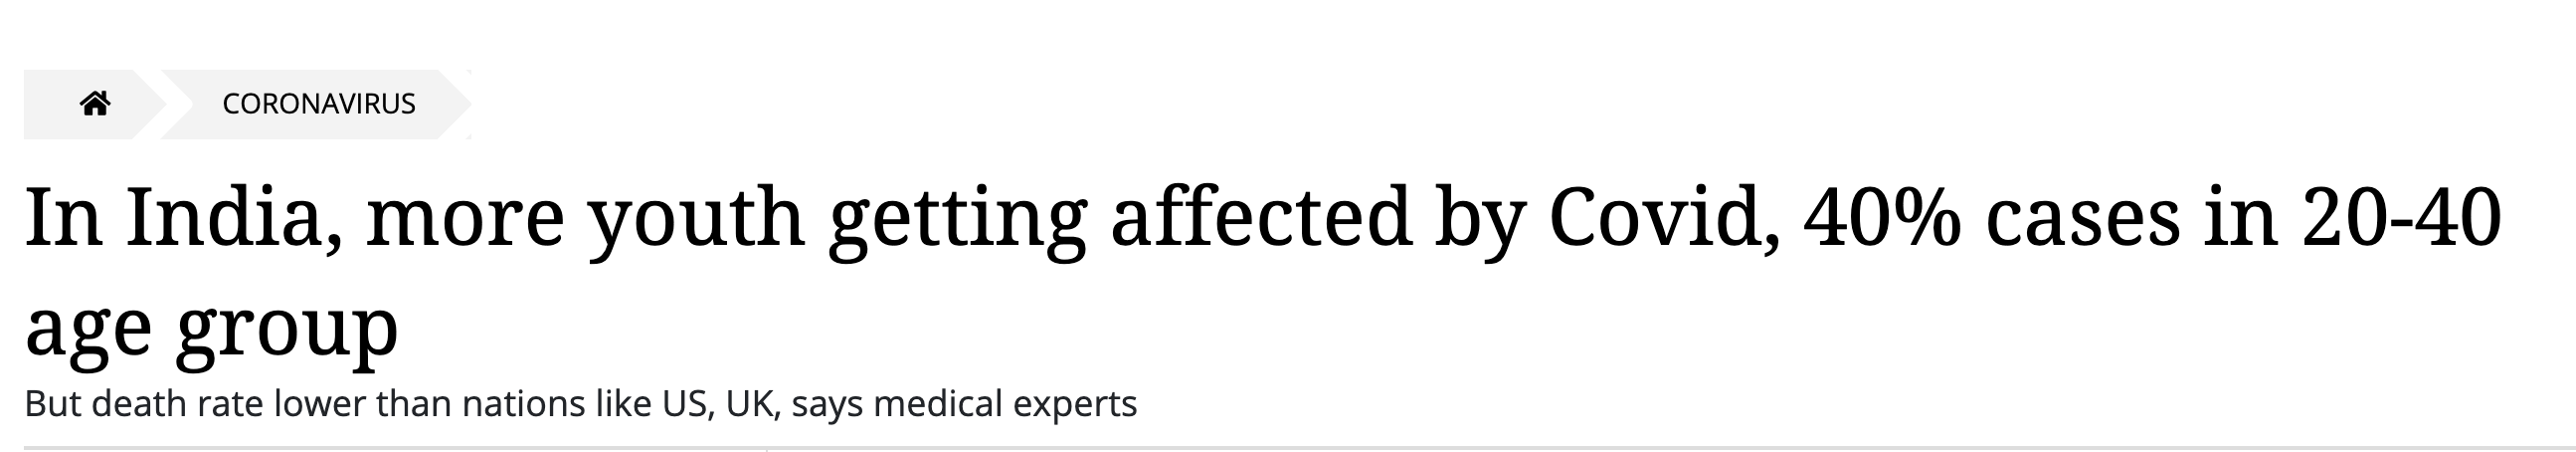

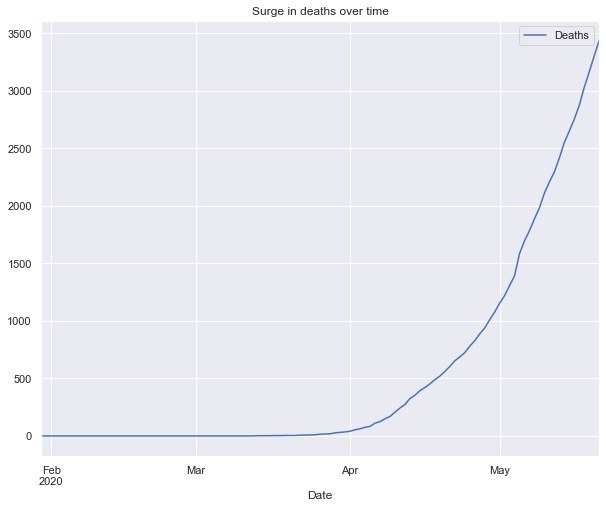

In [310]:
# Overall deaths in India MoM:

overall_cases.set_index('Date')['Deaths'].plot(title= 'Surge in deaths over time', legend=True, figsize=(10,8));



As shown in this graph displaying the timeline above, the deaths in India began in the end of April and soared in the month of May

Next, we're displaying the split of cases between M and F 

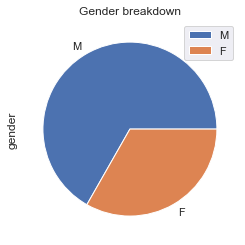

In [312]:
No_unknown['gender'].value_counts().plot(kind='pie', title= 'Gender breakdown', legend=True);

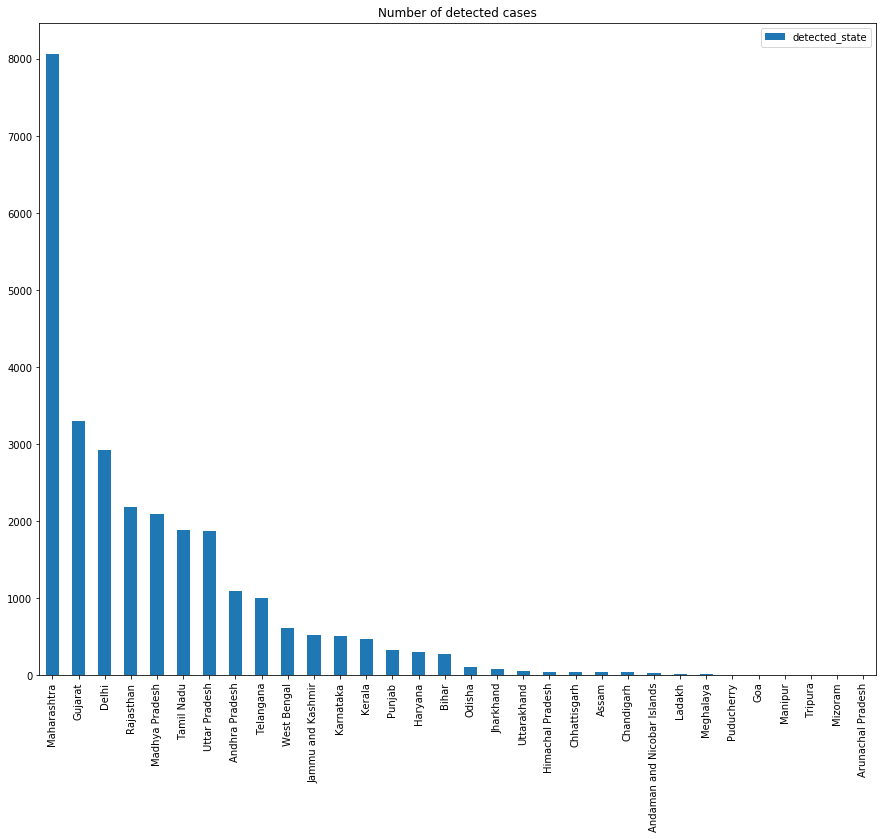

In [10]:
Individual_details.detected_state.value_counts().plot(kind='bar',figsize=(15,12),title= 'Number of detected cases', legend=True);

#The below graph displays that Maharastra has the highest number of individual cases detected while it is the 
#second largest in population.

# Delhi is on number 3 although it barely represents 1.39% of the country in population. This could indicate 
# travelers to Delhi could have caused a number this high in the Covid cases in that state.

Below graph displays that Uttar Pradesh stands at no.5 at number of testing labs although they have the highest population(about 16% of the India's population) 
in the country and Gujrat is at no.6 although they have the second highest number of cases in the country. 

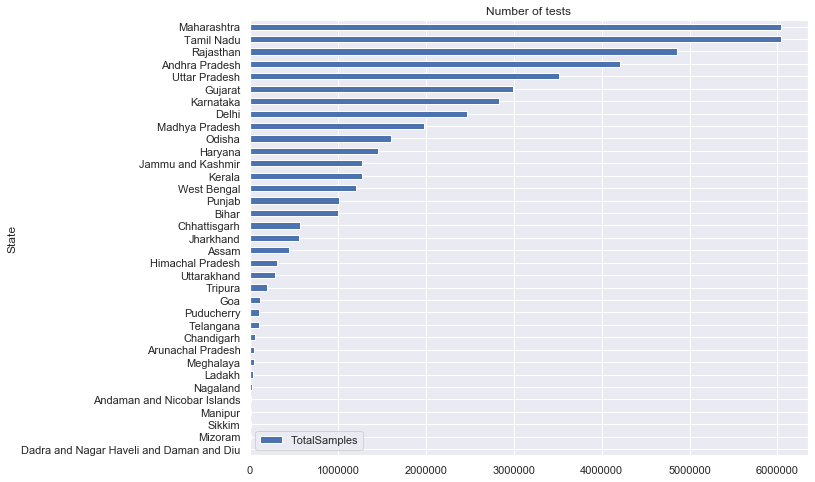

In [321]:
(State_testing
     .groupby('State')[['TotalSamples']]
     .sum().sort_values(by='TotalSamples',ascending=True)
     .plot(kind='barh',title='Number of tests',figsize=(10,8)));

The below graph shows the state Gujarat has a high number of true positives although it stands 6th in number of testing samples collected based on the graph above

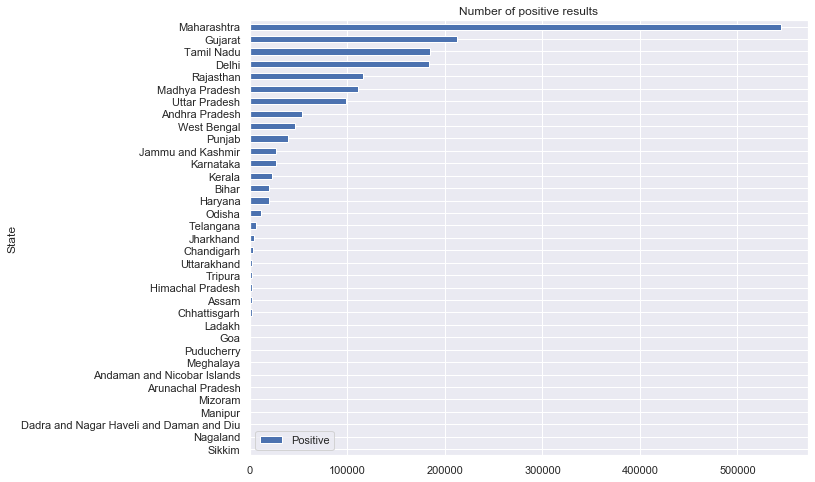

In [322]:
(State_testing
     .groupby('State')[['Positive']]
     .sum().sort_values(by='Positive',ascending=True)
     .plot(kind='barh',title='Number of positive results',figsize=(10,8)));

Conclusion:

To conclude, here a few points from this analysis:

- India is the second most populated country after China and hence it needs to increase its testing capacity
- Age groups being affected most in this region are between 20-40
- The State of Uttar Pradesh being the kmost populated will need particularly increase testing capacity
- Social distancing measures need to be maintained in the country for a longer period of time given population to land ratio of the country is small 

Finally, a better use of data can be done to implement better strategies and take informed decisions to tackle this pandemic and this requires accurate data collection by hospitals. This has been an issue due to lack of regulation in the medical industry